In [2]:
import pandas as pd

df = pd.read_csv('data/cause_of_death_indonesia.csv')

df

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,Bencana Alam,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
...,...,...,...,...,...,...,...,...
985,Tuberkulosis paru,Bencana Non Alam dan Penyakit,2004,0,3852,Profil Kesehatan Indonesia Tahun 2004,20,https://pusdatin.kemkes.go.id/download.php?fil...
986,Tuberkulosis paru lainnya,Bencana Non Alam dan Penyakit,2005,0,2024,Profil Kesehatan Indonesia Tahun 2005,21,https://pusdatin.kemkes.go.id/download.php?fil...
987,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2016,0,0,Profil Kesehatan Indonesia Tahun 2016,Lampiran 6.37,https://pusdatin.kemkes.go.id/download.php?fil...
988,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2017,0,0,Profil Kesehatan Indonesia Tahun 2017,Lampiran 6.43,https://pusdatin.kemkes.go.id/download.php?fil...


In [3]:
df.dtypes

Cause              object
Type               object
Year                int64
Data Redundancy     int64
Total Deaths        int64
Source             object
Page at Source     object
Source URL         object
dtype: object

In [4]:
df['Cause'] = df['Cause'].astype(str)
df['Type'] = df['Type'].astype(str)
df['Source'] = df['Source'].astype(str)
df['Page at Source'] = df['Page at Source'].astype(str)
df['Source URL'] = df['Source URL'].astype(str)

In [5]:
df.dtypes

Cause              object
Type               object
Year                int64
Data Redundancy     int64
Total Deaths        int64
Source             object
Page at Source     object
Source URL         object
dtype: object

In [6]:
df.columns

Index(['Cause', 'Type', 'Year', 'Data Redundancy', 'Total Deaths', 'Source',
       'Page at Source', 'Source URL'],
      dtype='object')

In [7]:
df.isnull().sum()

Cause              0
Type               0
Year               0
Data Redundancy    0
Total Deaths       0
Source             0
Page at Source     0
Source URL         0
dtype: int64

In [8]:
df[df['Source URL'].isna() | df['Page at Source'].isna()]

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL


In [9]:
df[df.duplicated(keep=False)]

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
586,KLB Diare,Bencana Non Alam dan Penyakit,2010,1,73,Profil Kesehatan Indonesia Tahun 2011,Lampiran 3.19,https://pusdatin.kemkes.go.id/download.php?fil...
587,KLB Diare,Bencana Non Alam dan Penyakit,2010,1,73,Profil Kesehatan Indonesia Tahun 2011,Lampiran 3.19,https://pusdatin.kemkes.go.id/download.php?fil...


In [10]:
df.loc[df['Cause'] == "COVID-19", "Total Deaths"] = 22138 + 22362
df.loc[df['Cause']  == "COVID-19", "Year"] = 2021
df.loc[df['Cause']  == "COVID-19", "Source URL"] = "unknown"
df.loc[df['Cause']  == "COVID-19", "Page at Source"] = "unknown"

In [11]:
df_to_drop = df[ df['Cause'] == "COVID-19 (per tanggal 24/4/2021)" ] 
df = df.drop(df_to_drop.index)
df.reset_index(drop=True, inplace=True)

In [12]:
df[(df["Cause"]=="COVID-19") | (df["Cause"]=="COVID-19 (per tanggal 24/4/2021)")]

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
310,COVID-19,Bencana Non Alam dan Penyakit,2021,1,44500,COVID19.go.id,unknown,unknown


In [13]:
df['Cause'] = df['Cause'].replace('\s+', ' ', regex=True)
df['Type'] = df['Type'].replace('\s+', ' ', regex=True)
df['Source'] = df['Source'].replace('\s+', ' ', regex=True)
df['Page at Source'] = df['Page at Source'].replace('\s+', ' ', regex=True)
df['Source URL'] = df['Source URL'].replace('\s+', ' ', regex=True)

In [14]:
df.drop_duplicates(subset=['Cause', 'Type', 'Year', 'Total Deaths'], inplace=True)
df = df[df['Total Deaths'] != 0]

#Clean df
df

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
9,AIDS,Bencana Non Alam dan Penyakit,2004,1,361,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
...,...,...,...,...,...,...,...,...
981,Tsunami Aceh (Hilang),Bencana Alam,2004,0,37527,Profil Kesehatan Indonesia Tahun 2004,94,https://pusdatin.kemkes.go.id/download.php?fil...
982,Tsunami Aceh (Meninggal),Bencana Alam,2004,0,129171,Profil Kesehatan Indonesia Tahun 2004,94,https://pusdatin.kemkes.go.id/download.php?fil...
983,Tuberkulosis,Bencana Non Alam dan Penyakit,2019,0,11993,Profil Kesehatan Indonesia Tahun 2019,Lampiran 52,https://pusdatin.kemkes.go.id/download.php?fil...
984,Tuberkulosis paru,Bencana Non Alam dan Penyakit,2004,0,3852,Profil Kesehatan Indonesia Tahun 2004,20,https://pusdatin.kemkes.go.id/download.php?fil...


In [15]:
df_disease = df[df['Type'] == 'Bencana Non Alam dan Penyakit'].reset_index()

df_disease.head(20)

,index,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
1,2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,4,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,9,AIDS,Bencana Non Alam dan Penyakit,2004,1,361,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
5,14,AIDS,Bencana Non Alam dan Penyakit,2005,1,592,Profil Kesehatan Indonesia Tahun 2005,79,https://pusdatin.kemkes.go.id/download.php?fil...
6,19,AIDS,Bencana Non Alam dan Penyakit,2005,1,509,Profil Kesehatan Indonesia Tahun 2011,148,https://pusdatin.kemkes.go.id/download.php?fil...
7,20,AIDS,Bencana Non Alam dan Penyakit,2006,1,539,Profil Kesehatan Indonesia Tahun 2006,89,https://pusdatin.kemkes.go.id/download.php?fil...
8,25,AIDS,Bencana Non Alam dan Penyakit,2006,1,635,Profil Kesehatan Indonesia Tahun 2011,148,https://pusdatin.kemkes.go.id/download.php?fil...
9,26,AIDS,Bencana Non Alam dan Penyakit,2007,1,498,Profil Kesehatan Indonesia Tahun 2007,84,https://pusdatin.kemkes.go.id/download.php?fil...


In [16]:
df_disease['Cause'].unique()

array(['AIDS', 'Antraks', 'Avian Influenza (Flu Burung)', 'Batuk Rejan',
       'Campak', 'Cedera intrakranial', 'Cedera lahir',
       'Cedera YDT lainnya YTT dan daerah badan Multipel',
       'Cedera, Keracunan, dan Akibat Sebab Luar Tertentu Lainnya',
       'COVID-19', 'Demam Berdarah Dengue (DBD)',
       'Demam Tifoid dan Paratifoid',
       'Demam yang Sebabnya Tidak Diketahui', 'Diabetes melitus YTT',
       'Diare',
       'Diare & gastroenteritis Oleh penyebab infeksi tertentu (kolitis infeksi)',
       'Difteri', 'Dispepsia', 'Eklamsia dan preeklamsia',
       'Faktor yg Mempengaruhi Keadaan Kesehatan & yg Berhubungan dengan Pelayanan Kesehatan',
       'Gagal ginjal lainnya', 'Gagal Teknologi',
       'Gangguan Mental & Perilaku',
       'Gangguan saluran napas lainnya yang berhubungan dengan masa perinatal',
       'Gastritis dan Duodenitis',
       'Gejala, Tanda & Penemuan Laboratorium, Klinik Abnormal YTK',
       'Gizi Buruk', 'Hepatitis B', 'Hepatitis Klinis',
      

In [17]:
df_disease['Data Redundancy'].unique()

array([1, 0], dtype=int64)

In [18]:
x = df_disease['Cause'].str.strip().value_counts()

x.sort_values(ascending=False)

Cause
KLB Diare                        29
Leptospirosis                    27
Tetanus Neonatorium              22
AIDS                             19
Demam Berdarah Dengue (DBD)      18
                                 ..
Gastritis dan Duodenitis          1
Gizi Buruk                        1
Kebakaran (Pemukiman)             1
Kecelakaan Transportasi Darat     1
Tuberkulosis paru lainnya         1
Name: count, Length: 119, dtype: int64

In [19]:
data_penyakit = [
   'AIDS', 'Antraks', 'Avian Influenza (Flu Burung)', 'Batuk Rejan',
   'Campak', 'COVID-19', 'Demam Berdarah Dengue (DBD)', 'Demam Tifoid dan Paratifoid',
   'Difteri', 'Diare & gastroenteritis Oleh penyebab infeksi tertentu (kolitis infeksi)',
   'Hepatitis B', 'Hepatitis Klinis', 'Infeksi khusus lainnya pada masa perinatal',
   'Infeksi Saluran Napas Bagian Atas Akut Lainnya', 'KLB Antraks', 'KLB Campak',
   'KLB Demam Berdarah Dengue (DBD)', 'KLB Dengue High Fever', 'KLB Dengue Shock Syndrome',
   'KLB Diare', 'KLB Difteri', 'KLB Gizi Buruk', 'KLB Hepatitis', 'KLB Leptospirosis', 'KLB Malaria', 'KLB Malaria Falsiparum',
   'KLB Polio', 'KLB Rabies', 'KLB Tetanus Neonatal', 'Leptospirosis', 'Malaria (termasuk semua malaria)',
   'Malaria Klinis', 'Tuberkulosis', 'Tuberkulosis paru', 'Tuberkulosis paru lainnya'
]

df_infectious_disease = df_disease[df_disease['Cause'].isin(data_penyakit)]

df_infectious_disease.reset_index(drop=True, inplace=True)

df_infectious_disease



,index,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
1,2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,4,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,9,AIDS,Bencana Non Alam dan Penyakit,2004,1,361,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
...,...,...,...,...,...,...,...,...,...
191,752,Malaria (termasuk semua malaria),Bencana Non Alam dan Penyakit,2004,0,3578,Profil Kesehatan Indonesia Tahun 2004,20,https://pusdatin.kemkes.go.id/download.php?fil...
192,753,Malaria Klinis,Bencana Non Alam dan Penyakit,2006,0,30,Profil Kesehatan Indonesia Tahun 2006,Lampiran 3.31,https://pusdatin.kemkes.go.id/download.php?fil...
193,983,Tuberkulosis,Bencana Non Alam dan Penyakit,2019,0,11993,Profil Kesehatan Indonesia Tahun 2019,Lampiran 52,https://pusdatin.kemkes.go.id/download.php?fil...
194,984,Tuberkulosis paru,Bencana Non Alam dan Penyakit,2004,0,3852,Profil Kesehatan Indonesia Tahun 2004,20,https://pusdatin.kemkes.go.id/download.php?fil...


<Axes: xlabel='Cause', ylabel='Total Deaths'>

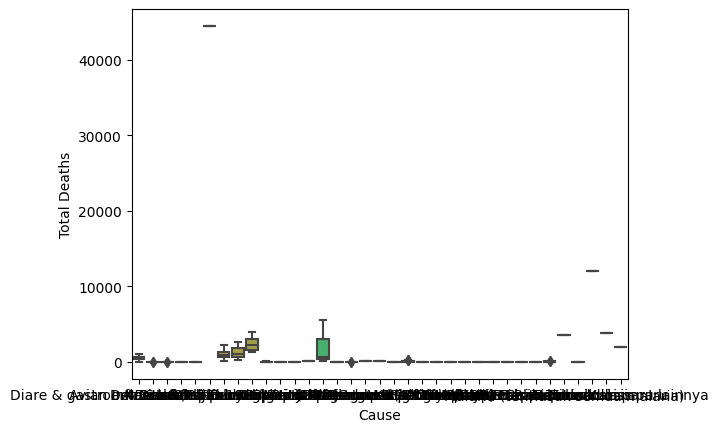

In [20]:
import seaborn as sns

sns.boxplot(x = df_infectious_disease['Cause'], y = df_infectious_disease['Total Deaths'], data=df_infectious_disease)


AttributeError: PathCollection.set() got an unexpected keyword argument 'kde'

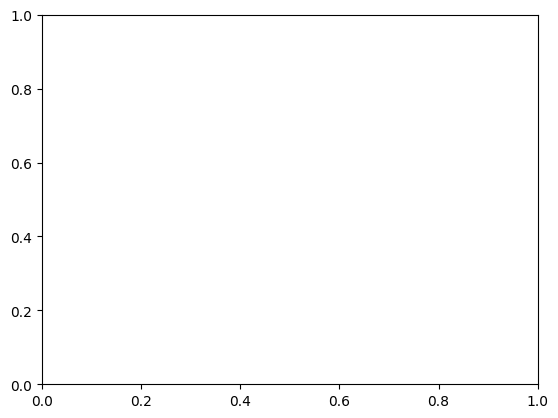

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

mean = df_infectious_disease['Total Deaths'].mean()
std = df_infectious_disease['Total Deaths'].std()

# Membuat histogram
sns.scatterplot(df_infectious_disease['Total Deaths'], kde=True, stat='density')

# Membuat kurva distribusi normal
x = np.linspace(df_infectious_disease['Total Deaths'].min(), df_infectious_disease['Total Deaths'].max(), 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y, 'r--')

# Menampilkan plot
plt.show()

In [ ]:
a = df_infectious_disease['Total Deaths'].mean()

b = df_infectious_disease['Total Deaths'].std()

lower = a - (3*b)
higher = a + (3*b)

df_infectious_disease = df_infectious_disease[(df_infectious_disease['Total Deaths'] >= lower) & df_infectious_disease['Total Deaths'] <= higher]


df_infectious_disease

,index,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
1,2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,4,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,9,AIDS,Bencana Non Alam dan Penyakit,2004,1,361,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
...,...,...,...,...,...,...,...,...,...
191,752,Malaria (termasuk semua malaria),Bencana Non Alam dan Penyakit,2004,0,3578,Profil Kesehatan Indonesia Tahun 2004,20,https://pusdatin.kemkes.go.id/download.php?fil...
192,753,Malaria Klinis,Bencana Non Alam dan Penyakit,2006,0,30,Profil Kesehatan Indonesia Tahun 2006,Lampiran 3.31,https://pusdatin.kemkes.go.id/download.php?fil...
193,983,Tuberkulosis,Bencana Non Alam dan Penyakit,2019,0,11993,Profil Kesehatan Indonesia Tahun 2019,Lampiran 52,https://pusdatin.kemkes.go.id/download.php?fil...
194,984,Tuberkulosis paru,Bencana Non Alam dan Penyakit,2004,0,3852,Profil Kesehatan Indonesia Tahun 2004,20,https://pusdatin.kemkes.go.id/download.php?fil...


<Axes: ylabel='Cause'>

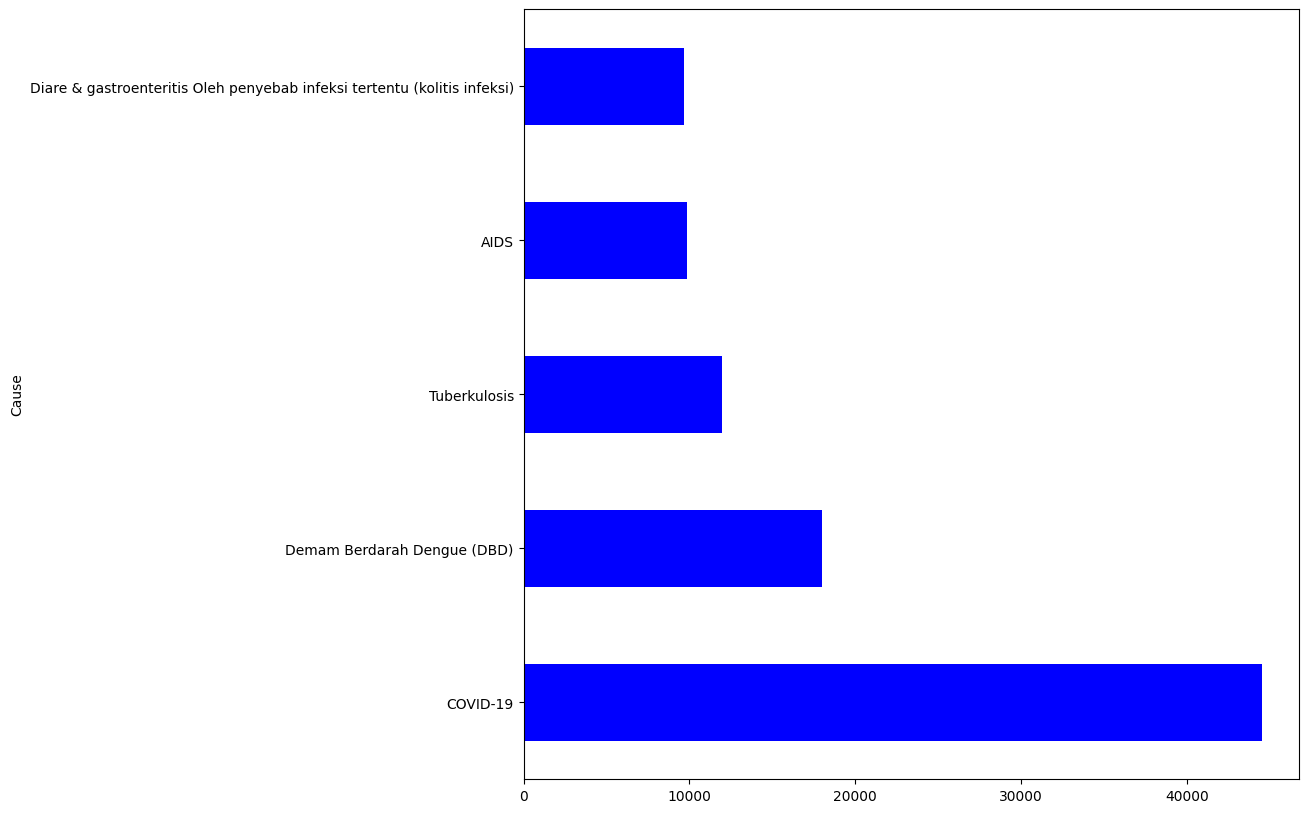

In [ ]:
total_death_of_infectious_disease = df_infectious_disease.groupby(['Cause'])['Total Deaths'].sum()

#Apabila ingin menampilkan 5 data cukup menggunakan head(5)

total_death_of_infectious_disease.sort_values(ascending=False).head(5).plot(kind='barh', figsize=(10, 10), color='blue')

In [ ]:
filter_df_infectious_disease_by_year = df_infectious_disease[(df_infectious_disease['Year'] >= 2014) & (df_infectious_disease['Year'] <= 2019)]

filter_df_infectious_disease_by_year

,index,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
18,41,AIDS,Bencana Non Alam dan Penyakit,2019,1,614,Profil Kesehatan Indonesia Tahun 2019,Lampiran 55.d,https://pusdatin.kemkes.go.id/download.php?fil...
30,121,Antraks,Bencana Non Alam dan Penyakit,2014,1,3,Profil Kesehatan Indonesia Tahun 2015,200,https://pusdatin.kemkes.go.id/download.php?fil...
31,132,Antraks,Bencana Non Alam dan Penyakit,2017,1,1,Profil Kesehatan Indonesia Tahun 2017,212,https://pusdatin.kemkes.go.id/download.php?fil...
45,221,Avian Influenza (Flu Burung),Bencana Non Alam dan Penyakit,2014,1,2,Profil Kesehatan Indonesia Tahun 2014,165,https://pusdatin.kemkes.go.id/download.php?fil...
46,226,Avian Influenza (Flu Burung),Bencana Non Alam dan Penyakit,2015,1,2,Profil Kesehatan Indonesia Tahun 2015,201,https://pusdatin.kemkes.go.id/download.php?fil...
47,233,Avian Influenza (Flu Burung),Bencana Non Alam dan Penyakit,2017,1,1,Profil Kesehatan Indonesia Tahun 2017,213,https://pusdatin.kemkes.go.id/download.php?fil...
56,288,Campak,Bencana Non Alam dan Penyakit,2014,1,8,Profil Kesehatan Indonesia Tahun 2014,Lampiran 6.16,https://pusdatin.kemkes.go.id/download.php?fil...
57,289,Campak,Bencana Non Alam dan Penyakit,2015,1,1,Profil Kesehatan Indonesia Tahun 2015,Lampiran 6.16,https://pusdatin.kemkes.go.id/download.php?fil...
58,290,Campak,Bencana Non Alam dan Penyakit,2017,1,1,Profil Kesehatan Indonesia Tahun 2017,Lampiran 6.22,https://pusdatin.kemkes.go.id/download.php?fil...
72,329,Demam Berdarah Dengue (DBD),Bencana Non Alam dan Penyakit,2014,1,907,Profil Kesehatan Indonesia Tahun 2014,Lampiran 6.24,https://pusdatin.kemkes.go.id/download.php?fil...


In [ ]:
#Mendpatkan index dari total deaths terbesar
idx_max_deaths = filter_df_infectious_disease_by_year.groupby('Year')['Total Deaths'].idxmax()


idx_max_deaths


Year
2014     72
2015     73
2016     74
2017     75
2018     76
2019    193
Name: Total Deaths, dtype: int64

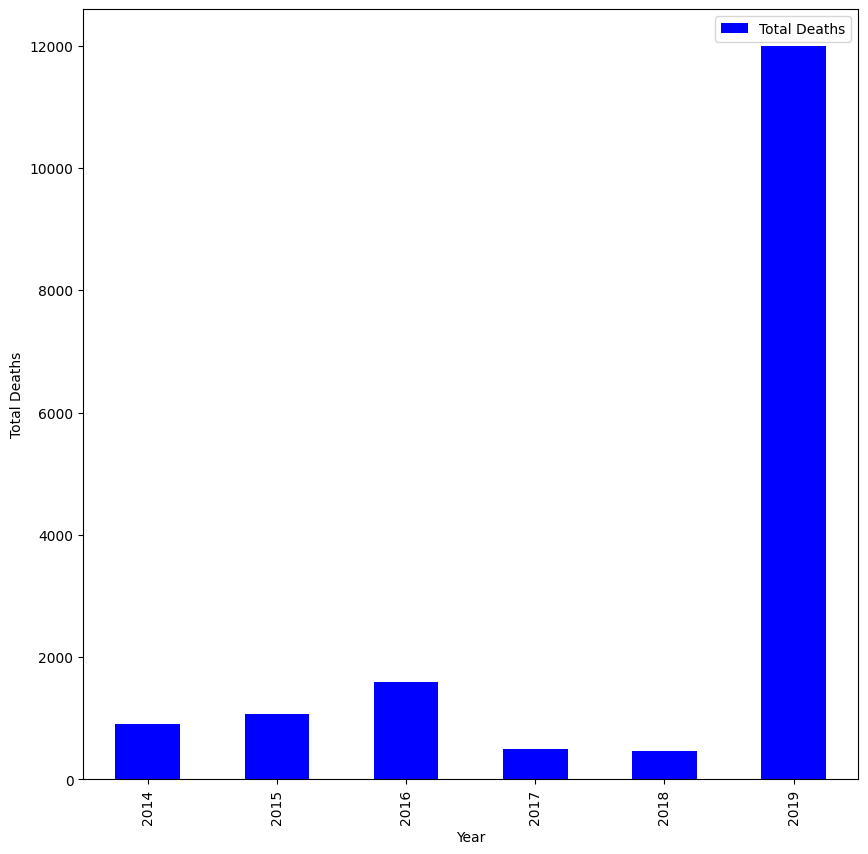

,index,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
72,329,Demam Berdarah Dengue (DBD),Bencana Non Alam dan Penyakit,2014,1,907,Profil Kesehatan Indonesia Tahun 2014,Lampiran 6.24,https://pusdatin.kemkes.go.id/download.php?fil...
73,330,Demam Berdarah Dengue (DBD),Bencana Non Alam dan Penyakit,2015,1,1071,Profil Kesehatan Indonesia Tahun 2015,Lampiran 6.24,https://pusdatin.kemkes.go.id/download.php?fil...
74,331,Demam Berdarah Dengue (DBD),Bencana Non Alam dan Penyakit,2016,1,1598,Profil Kesehatan Indonesia Tahun 2016,Lampiran 6.27,https://pusdatin.kemkes.go.id/download.php?fil...
75,332,Demam Berdarah Dengue (DBD),Bencana Non Alam dan Penyakit,2017,1,493,Profil Kesehatan Indonesia Tahun 2017,Lampiran 6.31,https://pusdatin.kemkes.go.id/download.php?fil...
76,333,Demam Berdarah Dengue (DBD),Bencana Non Alam dan Penyakit,2018,1,467,Profil Kesehatan Indonesia Tahun 2018,Lampiran 6.32,https://pusdatin.kemkes.go.id/download.php?fil...
193,983,Tuberkulosis,Bencana Non Alam dan Penyakit,2019,0,11993,Profil Kesehatan Indonesia Tahun 2019,Lampiran 52,https://pusdatin.kemkes.go.id/download.php?fil...


In [ ]:
import matplotlib.pyplot as plt

df_highest_deaths_per_year = filter_df_infectious_disease_by_year.loc[idx_max_deaths]

# Menampilkan nama penyakit pada setiap bar
df_highest_deaths_per_year.plot(kind='bar', x='Year', y='Total Deaths', figsize=(10, 10), color='blue', tick_label=df_highest_deaths_per_year['Cause'])

# Menambahkan label sumbu x dan y
plt.xlabel('Year')
plt.ylabel('Total Deaths')

# Menampilkan plot
plt.show()

df_highest_deaths_per_year


<Axes: ylabel='Total Deaths'>

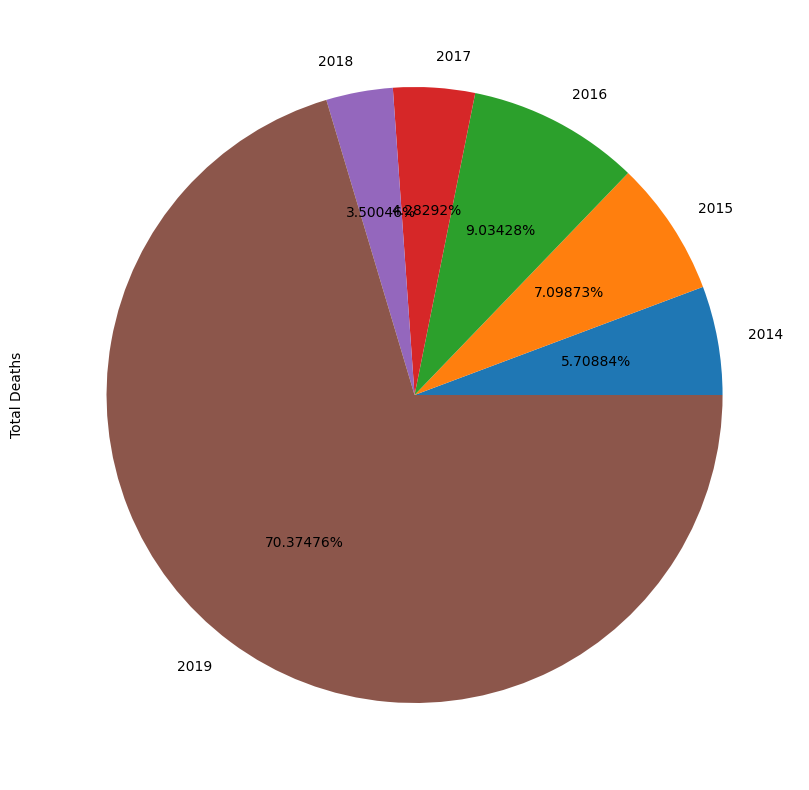

In [ ]:
a = filter_df_infectious_disease_by_year.groupby('Year')['Total Deaths'].sum()

a.plot(kind='pie', figsize=(10, 10), autopct='%1.5f%%')

In [ ]:
DBD = df_infectious_disease[df_infectious_disease['Cause'] == 'Demam Berdarah Dengue (DBD)']
DBD

,index,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
60,311,Demam Berdarah Dengue (DBD),Bencana Non Alam dan Penyakit,2006,1,68,Profil Kesehatan Indonesia Tahun 2006,Lampiran 3.31,https://pusdatin.kemkes.go.id/download.php?fil...
61,312,Demam Berdarah Dengue (DBD),Bencana Non Alam dan Penyakit,2006,1,2223,Profil Kesehatan Indonesia Tahun 2006,25,https://pusdatin.kemkes.go.id/download.php?fil...
62,314,Demam Berdarah Dengue (DBD),Bencana Non Alam dan Penyakit,2006,1,1196,Profil Kesehatan Indonesia Tahun 2010,Lampiran 3.32,https://pusdatin.kemkes.go.id/download.php?fil...
63,315,Demam Berdarah Dengue (DBD),Bencana Non Alam dan Penyakit,2007,1,1599,Profil Kesehatan Indonesia Tahun 2007,Lampiran 3.23,https://pusdatin.kemkes.go.id/download.php?fil...
64,318,Demam Berdarah Dengue (DBD),Bencana Non Alam dan Penyakit,2008,1,1187,Profil Kesehatan Indonesia Tahun 2009,Lampiran 3.26,https://pusdatin.kemkes.go.id/download.php?fil...
65,320,Demam Berdarah Dengue (DBD),Bencana Non Alam dan Penyakit,2009,1,898,Profil Kesehatan Indonesia Tahun 2009,Lampiran 3.3,https://pusdatin.kemkes.go.id/download.php?fil...
66,321,Demam Berdarah Dengue (DBD),Bencana Non Alam dan Penyakit,2009,1,1420,Profil Kesehatan Indonesia Tahun 2009,Lampiran 3.26,https://pusdatin.kemkes.go.id/download.php?fil...
67,323,Demam Berdarah Dengue (DBD),Bencana Non Alam dan Penyakit,2010,1,325,Profil Kesehatan Indonesia Tahun 2010,41,https://pusdatin.kemkes.go.id/download.php?fil...
68,324,Demam Berdarah Dengue (DBD),Bencana Non Alam dan Penyakit,2010,1,1358,Profil Kesehatan Indonesia Tahun 2010,Lampiran 3.32,https://pusdatin.kemkes.go.id/download.php?fil...
69,326,Demam Berdarah Dengue (DBD),Bencana Non Alam dan Penyakit,2011,1,597,Profil Kesehatan Indonesia Tahun 2011,Lampiran 3.35,https://pusdatin.kemkes.go.id/download.php?fil...


,Year,Total Deaths
0,2006,3487
1,2007,1599
2,2008,1187
3,2009,2318
4,2010,1683
5,2011,597
6,2012,816
7,2013,871
8,2014,907
9,2015,1071


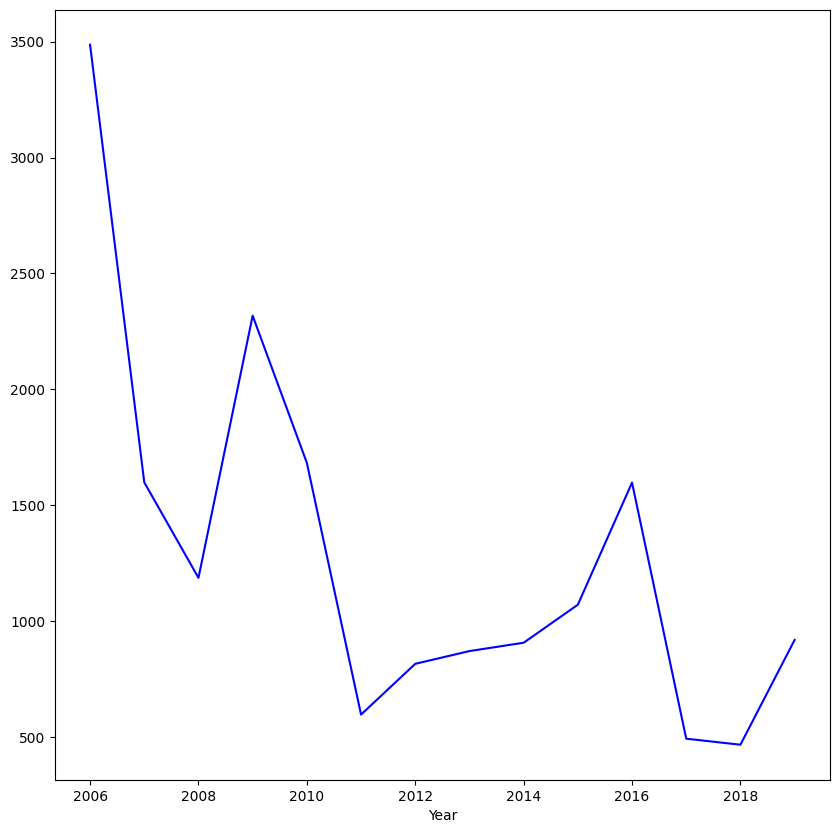

In [ ]:
# Menggabungkan total deaths pada tahun yang sama
dbd_total_deaths_per_year = DBD.groupby('Year')['Total Deaths'].sum().reset_index()
# Menampilkan DataFrame baru
(dbd_total_deaths_per_year).plot(kind='line', x='Year', y='Total Deaths', figsize=(10, 10), color='blue', legend=None)

dbd_total_deaths_per_year


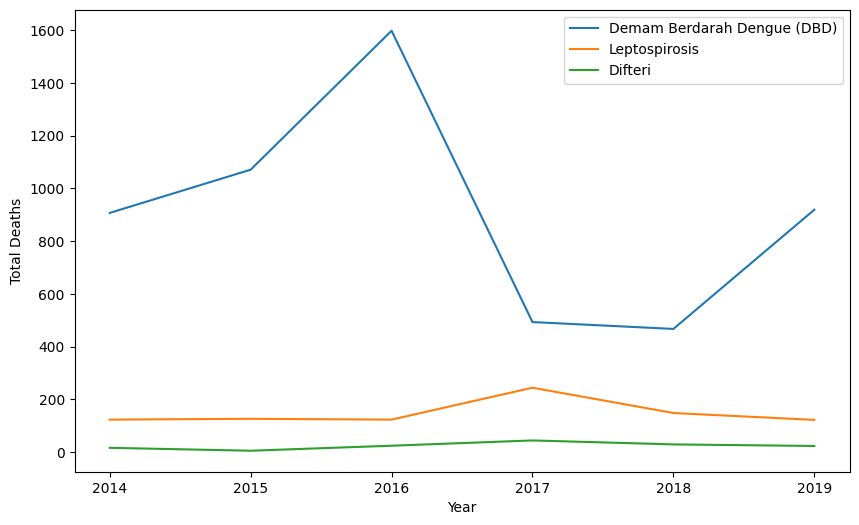

In [ ]:
infectious_disease = ['Demam Berdarah Dengue (DBD)', 'Leptospirosis', 'Difteri']

# Mengelompokkan data berdasarkan penyebab (Cause) dan tahun (Year)
grouped_data = filter_df_infectious_disease_by_year.groupby(['Cause', 'Year'])['Total Deaths'].sum().reset_index()

# Filter data untuk 3 penyakit teratas
filtered_data = grouped_data[grouped_data['Cause'].isin(infectious_disease)]

# Mengatur ukuran figure
plt.figure(figsize=(10, 6))

# Membuat plot garis untuk setiap penyakit
for disease in infectious_disease:
   disease_data = filtered_data[filtered_data['Cause'] == disease]
   plt.plot(disease_data['Year'], disease_data['Total Deaths'], label=disease)

# Memberikan label pada sumbu x dan y
plt.xlabel('Year')
plt.ylabel('Total Deaths')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()




In [ ]:
# Membuat Kategori Penyakit
   # Kronis
   # Menular
   # Lainnya

infectious_data = ['AIDS']
cronic_data = ['Tuberkolosis']

def kategori_penyakit(penyakit):
   if penyakit in infectious_data:
      return 'Penyakit Menular'
   elif penyakit in cronic_data:
      return 'Penyakit Kronis'
   else:
      return 'Penyakit Lainnya'


df_infectious_disease['Category'] = [kategori_penyakit(p) for p in df_infectious_disease['Cause']]

df_infectious_disease

,index,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL,Category
0,1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...,Penyakit Menular
1,2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...,Penyakit Menular
2,3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...,Penyakit Menular
3,4,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...,Penyakit Menular
4,9,AIDS,Bencana Non Alam dan Penyakit,2004,1,361,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...,Penyakit Menular
...,...,...,...,...,...,...,...,...,...,...
191,752,Malaria (termasuk semua malaria),Bencana Non Alam dan Penyakit,2004,0,3578,Profil Kesehatan Indonesia Tahun 2004,20,https://pusdatin.kemkes.go.id/download.php?fil...,Penyakit Lainnya
192,753,Malaria Klinis,Bencana Non Alam dan Penyakit,2006,0,30,Profil Kesehatan Indonesia Tahun 2006,Lampiran 3.31,https://pusdatin.kemkes.go.id/download.php?fil...,Penyakit Lainnya
193,983,Tuberkulosis,Bencana Non Alam dan Penyakit,2019,0,11993,Profil Kesehatan Indonesia Tahun 2019,Lampiran 52,https://pusdatin.kemkes.go.id/download.php?fil...,Penyakit Lainnya
194,984,Tuberkulosis paru,Bencana Non Alam dan Penyakit,2004,0,3852,Profil Kesehatan Indonesia Tahun 2004,20,https://pusdatin.kemkes.go.id/download.php?fil...,Penyakit Lainnya


<Axes: ylabel='Total Deaths'>

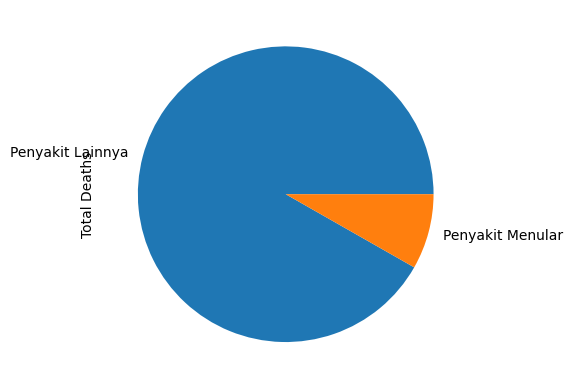

In [ ]:
df_infectious_disease.groupby('Category')['Total Deaths'].sum().plot(kind='pie')